In [102]:
import numpy as np # librería para manejar datos vectorizados

import pandas as pd # librería para análisis de datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # librería para manejar archivos JSON 

import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas

# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans

In [103]:
pip install geopy

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [104]:
from geopy.geocoders import Nominatim

In [105]:
pip install folium 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [106]:
pip install BeautifulSoup4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [107]:
import urllib.request
from bs4 import BeautifulSoup

In [108]:
data={'CITY':['BARCELONA','MADRID','CHICAGO','NEW_YORK','SYDNEY','HELSINKY','OSLO','PARIS','BERLIN','LONDON','ROME'], 'COUNRY':['SPAIN','SPAIN','USA','USA','AUSTRALIA','FINDLAND','NORWAY','FRANCE','GERMANY','UK','ITALY'],'LATITUDE':[41.39,40.42, 41.85, 40.71,-33.87,60.17,59.91, 48.85,52.52,51.51, 41.89],'LONGITUDE':[2.17, -3.70,-87.65,-74.01,151.21,24.94,10.75,2.35,13.42,-0.09,12.51]}

In [109]:
df=pd.DataFrame(data)

In [110]:
df.insert(4,"INHABITANTS (MILLIONS)",[1.66, 3.34, 2.69, 8.34, 4.91, 0.66, 0.70, 2.14, 3.77, 9.43, 2.28],True)
df.insert(5, "TOURISTS 2018 (MILLIONS)", [15.80, 7.10, 58.00, 65.20, 16.10, 1.24, 4.80, 40.00, 13.50, 20.42, 15.20], True)
df.insert(6, "RATIO", [9.49, 2.13, 21.58, 7.82, 3.28, 1.89, 6.88, 18.70, 3.58, 2.17, 3.55], True)
df.insert(7, "SEA COAST", ["YES", "NO", "YES","YES","YES","YES","YES","NO","NO","NO","NO"], True)
df.head()

,CITY,COUNRY,LATITUDE,LONGITUDE,INHABITANTS (MILLIONS),TOURISTS 2018 (MILLIONS),RATIO,SEA COAST
0,BARCELONA,SPAIN,41.39,2.17,1.66,15.8,9.49,YES
1,MADRID,SPAIN,40.42,-3.70,3.34,7.1,2.13,NO
2,CHICAGO,USA,41.85,-87.65,2.69,58.0,21.58,YES
3,NEW_YORK,USA,40.71,-74.01,8.34,65.2,7.82,YES
4,SYDNEY,AUSTRALIA,-33.87,151.21,4.91,16.1,3.28,YES


In [111]:
CLIENT_ID = '5EN0SHICD0APBOOPIYVHRAX02P40JP1DSH5CNRMQZUTOFG0T' # su ID de Foursquare
CLIENT_SECRET = 'DFAIYPCITBYFMELJEVQWEELXJTBQC3GVDWOZG5HZLAHNBOUP' # Secreto de Foursquare
VERSION = '20180605' # versión de la API de Foursquare
LIMIT = 100 # Un valor límite para la API de Foursquare

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5EN0SHICD0APBOOPIYVHRAX02P40JP1DSH5CNRMQZUTOFG0T
CLIENT_SECRET:DFAIYPCITBYFMELJEVQWEELXJTBQC3GVDWOZG5HZLAHNBOUP


In [112]:
#Explorar las ciudades
def getNearbyVenues(names, latitudes, longitudes, radius=500): 
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # crear la URL de solicitud de API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # solicitud GET
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # regresa solo información relevante de cada sitio cercano
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['CITY', 
                  'CITY Latitude', 
                  'CITY Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [113]:
venues = getNearbyVenues(names=df['CITY'],latitudes=df['LATITUDE'],longitudes=df['LONGITUDE'])

BARCELONA
MADRID
CHICAGO
NEW_YORK
SYDNEY
HELSINKY
OSLO
PARIS
BERLIN
LONDON
ROME


In [114]:
venues.groupby('CITY').count()

,CITY Latitude,CITY Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
CITY,,,,,,
BARCELONA,100,100,100,100,100,100
BERLIN,68,68,68,68,68,68
CHICAGO,18,18,18,18,18,18
HELSINKY,82,82,82,82,82,82
LONDON,47,47,47,47,47,47
MADRID,100,100,100,100,100,100
NEW_YORK,100,100,100,100,100,100
OSLO,76,76,76,76,76,76
PARIS,69,69,69,69,69,69


In [115]:
# analizar las ciudades
# codificación
cities_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# añadir la columna de ciudad de regreso al dataframe
cities_onehot['CITY'] = venues['CITY'] 

# mover la columna de barrio a la primer columna
fixed_columns = [cities_onehot.columns[-1]] + list(cities_onehot.columns[:-1])
cities_onehot = cities_onehot[fixed_columns]

cities_onehot.head()

,CITY,Accessories Store,Adult Boutique,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brasserie,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Café,Photography Studio,Pizza Place,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Service,Restaurant,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Soup Place,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Trail,Train Station,Trattoria/Osteria,Tree,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,BARCELONA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,BARCELONA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,BARCELONA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [116]:
cities_grouped = cities_onehot.groupby('CITY').mean().reset_index()
cities_grouped

,CITY,Accessories Store,Adult Boutique,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brasserie,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Café,Photography Studio,Pizza Place,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Service,Restaurant,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Soup Place,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Trail,Train Station,Trattoria/Osteria,Tree,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,BARCELONA,0.01,0.00,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.00,0.00,0.01,0.000000,0.000000,0.020000,0.010000,0.000000,0.020000,0.010000,0.020000,0.010000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.030000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.00,0.000000,0.000000,0.00,0.030000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.00,0.010000,0.02,0.00,0.000000,0.01,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.050000,0.190000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.00,0.010000,0.000000,0.01,0.000000,0.000000,0.000000,0.01,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.01,0.020000,0.00,0.00000,0.000000,

In [117]:
num_top_venues = 10

for hood in cities_grouped['CITY']:
    print("----"+hood+"----")
    temp = cities_grouped[cities_grouped['CITY'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BARCELONA----
                      venue  freq
0                     Hotel  0.19
1                    Hostel  0.05
2                Restaurant  0.04
3          Tapas Restaurant  0.04
4              Burger Joint  0.03
5        Spanish Restaurant  0.03
6            Clothing Store  0.03
7               Yoga Studio  0.02
8                      Café  0.02
9  Mediterranean Restaurant  0.02


----BERLIN----
                  venue  freq
0             Nightclub  0.12
1        Clothing Store  0.07
2  Gym / Fitness Center  0.04
3             Drugstore  0.03
4           Supermarket  0.03
5           Coffee Shop  0.03
6        Cosmetics Shop  0.03
7                 Hotel  0.03
8            Restaurant  0.03
9             Gift Shop  0.03


----CHICAGO----
                     venue  freq
0       Mexican Restaurant  0.11
1                      Gym  0.11
2  Health & Beauty Service  0.06
3                 Heliport  0.06
4           Sandwich Place  0.06
5     Gym / Fitness Center  0.06
6           

In [118]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [119]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# crear las columnas acorde al numero de sitios populares
columns = ['CITY']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# crear un nuevo dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['CITY'] = cities_grouped['CITY']

for ind in np.arange(cities_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,CITY,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BARCELONA,Hotel,Hostel,Restaurant,Tapas Restaurant,Spanish Restaurant,Burger Joint,Clothing Store,Cosmetics Shop,Sporting Goods Shop,Gourmet Shop
1,BERLIN,Nightclub,Clothing Store,Gym / Fitness Center,Gift Shop,Coffee Shop,Drugstore,Outdoor Supply Store,Supermarket,Furniture / Home Store,Cosmetics Shop
2,CHICAGO,Gym,Mexican Restaurant,Ice Cream Shop,Heliport,Sandwich Place,Brewery,Gym / Fitness Center,Health & Beauty Service,Train Station,Pub
3,HELSINKY,Café,Coffee Shop,Park,Burger Joint,Rock Club,Hobby Shop,Plaza,Record Shop,Food Court,Clothing Store
4,LONDON,Pub,Italian Restaurant,Coffee Shop,Pedestrian Plaza,Seafood Restaurant,Pizza Place,Cocktail Bar,Steakhouse,Gym / Fitness Center,French Restaurant


In [120]:
# establecer el número de agrupaciones
kclusters = 4

cities_grouped_clustering = cities_grouped.drop('CITY',1)

# ejecutar k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

# revisar las etiquetas de las agrupaciones generadas para cada fila del dataframe
kmeans.labels_[0:10] 

# añadir etiquetas
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [121]:
df_merged = df
df_merged = df_merged.join(cities_venues_sorted.set_index('CITY'), on='CITY')

In [122]:
df_merged.head()

,CITY,COUNRY,LATITUDE,LONGITUDE,INHABITANTS (MILLIONS),TOURISTS 2018 (MILLIONS),RATIO,SEA COAST,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BARCELONA,SPAIN,41.39,2.17,1.66,15.8,9.49,YES,1,Hotel,Hostel,Restaurant,Tapas Restaurant,Spanish Restaurant,Burger Joint,Clothing Store,Cosmetics Shop,Sporting Goods Shop,Gourmet Shop
1,MADRID,SPAIN,40.42,-3.70,3.34,7.1,2.13,NO,1,Hotel,Plaza,Café,Restaurant,Tapas Restaurant,Cosmetics Shop,Clothing Store,Cocktail Bar,Vegetarian / Vegan Restaurant,Gourmet Shop
2,CHICAGO,USA,41.85,-87.65,2.69,58.0,21.58,YES,0,Gym,Mexican Restaurant,Ice Cream Shop,Heliport,Sandwich Place,Brewery,Gym / Fitness Center,Health & Beauty Service,Train Station,Pub
3,NEW_YORK,USA,40.71,-74.01,8.34,65.2,7.82,YES,1,Coffee Shop,Hotel,Clothing Store,Memorial Site,Pizza Place,Sandwich Place,Jewelry Store,Park,Wine Shop,Gym / Fitness Center
4,SYDNEY,AUSTRALIA,-33.87,151.21,4.91,16.1,3.28,YES,1,Café,Coffee Shop,Hotel,Bar,Cocktail Bar,Shopping Mall,Speakeasy,Bookstore,Japanese Restaurant,Clothing Store


In [123]:
df_merged['Cluster Labels']=df_merged['Cluster Labels'].astype(int)

In [124]:
import folium

In [125]:
# crear mapa
map_clusters = folium.Map(zoom_start=4)

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['LATITUDE'], df_merged['LONGITUDE'], df_merged['CITY'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [126]:
# agrupación 1
df_merged.loc[df_merged['Cluster Labels'] == 0,df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,CITY,TOURISTS 2018 (MILLIONS),RATIO,SEA COAST,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,CHICAGO,58.0,21.58,YES,0,Gym,Mexican Restaurant,Ice Cream Shop,Heliport,Sandwich Place,Brewery,Gym / Fitness Center,Health & Beauty Service,Train Station,Pub


In [127]:
# agrupación 2
df_merged.loc[df_merged['Cluster Labels'] == 1,df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,CITY,TOURISTS 2018 (MILLIONS),RATIO,SEA COAST,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BARCELONA,15.80,9.49,YES,1,Hotel,Hostel,Restaurant,Tapas Restaurant,Spanish Restaurant,Burger Joint,Clothing Store,Cosmetics Shop,Sporting Goods Shop,Gourmet Shop
1,MADRID,7.10,2.13,NO,1,Hotel,Plaza,Café,Restaurant,Tapas Restaurant,Cosmetics Shop,Clothing Store,Cocktail Bar,Vegetarian / Vegan Restaurant,Gourmet Shop
3,NEW_YORK,65.20,7.82,YES,1,Coffee Shop,Hotel,Clothing Store,Memorial Site,Pizza Place,Sandwich Place,Jewelry Store,Park,Wine Shop,Gym / Fitness Center
4,SYDNEY,16.10,3.28,YES,1,Café,Coffee Shop,Hotel,Bar,Cocktail Bar,Shopping Mall,Speakeasy,Bookstore,Japanese Restaurant,Clothing Store
5,HELSINKY,1.24,1.89,YES,1,Café,Coffee Shop,Park,Burger Joint,Rock Club,Hobby Shop,Plaza,Record Shop,Food Court,Clothing Store
6,OSLO,4.80,6.88,YES,1,Hotel,Coffee Shop,Clothing Store,Café,Salad Place,Bar,Department Store,Camera Store,Record Shop,Restaurant
8,BERLIN,13.50,3.58,NO,1,Nightclub,Clothing Store,Gym / Fitness Center,Gift Shop,Coffee Shop,Drugstore,Outdoor Supply Store,Supermarket,Furniture / Home Store,Cosmetics Shop
9,LONDON,20.42,2.17,NO,1,Pub,Italian Restaurant,Coffee Shop,Pedestrian Plaza,Seafood Restaurant,Pizza Place,Cocktail Bar,Steakhouse,Gym / Fitness Center,French Restaurant


In [128]:
# agrupación 3
df_merged.loc[df_merged['Cluster Labels'] == 2,df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,CITY,TOURISTS 2018 (MILLIONS),RATIO,SEA COAST,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,ROME,15.2,3.55,NO,2,Italian Restaurant,Hotel,Bed & Breakfast,Café,Ice Cream Shop,Pizza Place,Bistro,Restaurant,Chinese Restaurant,Plaza


In [129]:
# agrupación 4
df_merged.loc[df_merged['Cluster Labels'] == 3,df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,CITY,TOURISTS 2018 (MILLIONS),RATIO,SEA COAST,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,PARIS,40.0,18.7,NO,3,French Restaurant,Bar,Café,Coffee Shop,Plaza,Japanese Restaurant,Bakery,Ice Cream Shop,Italian Restaurant,Garden


In [130]:
import matplotlib.pyplot as plt


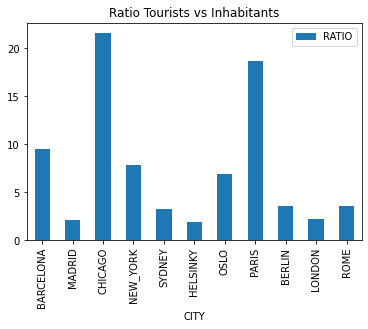

In [135]:
my_plot = df_merged.plot("CITY", "RATIO", kind="bar")
plt.title('Ratio Tourists vs Inhabitants')
plt.show() # no necesariamente en Jupyter Notebooks

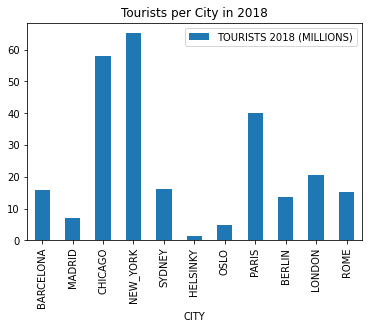

In [132]:
my_plot = df_merged.plot("CITY", "TOURISTS 2018 (MILLIONS)", kind="bar")
plt.title('Tourists per City in 2018')
plt.show() # no necesariamente en Jupyter Notebooks